# Oracle - Demo

In [1]:
from QArithmetic import mult

C:\ProgramData\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit import BasicAer
from qiskit.tools.visualization import iplot_histogram
from qiskit.tools.visualization import circuit_drawer

In [3]:
# number of qubits
N = 2
a = QuantumRegister(N, 'a')
b = QuantumRegister(N, 'b')
m = QuantumRegister(2*N, 'res')
anc = QuantumRegister(4, 'anc')
c = QuantumRegister(N, 'anc2')

cr = ClassicalRegister(2*N+1)

In [4]:
#create quantum circuit
qc = QuantumCircuit(a, b, m, anc, cr)
qc.add_register(c)

In [5]:
H = QuantumCircuit(a, b, m, anc, c, cr)

In [6]:
H.h(a)
H.h(b)

In [7]:
mult(qc, a, b, m, N)

In [8]:
qc.x(m[0])
qc.x(m[3])

qc.ccx(m[0], m[1], anc[0])
qc.ccx(m[2], anc[0], anc[1])
qc.ccx(m[3], anc[2], anc[1])
qc.cx(anc[1], anc[2])
qc.ccx(m[3], anc[2], anc[1])
qc.ccx(m[2], anc[0], anc[1])
qc.ccx(m[0], m[1], anc[0])

qc.x(m[0])
qc.x(m[3])

In [9]:
Grover = H + qc 

In [10]:
Grover.barrier(a)
Grover.barrier(b)
Grover.measure(a[0], cr[0])
Grover.measure(a[1], cr[1])
Grover.measure(b[0], cr[2])
Grover.measure(b[1], cr[3])
Grover.measure(anc[2], cr[4])

In [11]:
from qiskit import BasicAer

backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(Grover, backend_sim)

In [12]:
result_sim = job_sim.result()

C:\ProgramData\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [13]:
counts = result_sim.get_counts(Grover)
print(counts)

{'00100': 80, '00011': 67, '01000': 66, '01111': 43, '00101': 57, '00000': 54, '11110': 72, '01100': 72, '01101': 69, '11011': 62, '01001': 69, '00010': 74, '00111': 66, '00001': 57, '00110': 56, '01010': 60}


C:\ProgramData\Anaconda3\lib\site-packages\marshmallow\schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


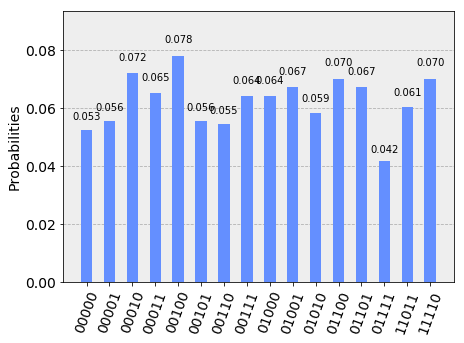

In [14]:
from qiskit.tools.visualization import plot_histogram, iplot_histogram

plot_histogram(counts)